## Tom Brady data release R Introduction

Below we've included some sample code to load in the events and plays datasets, some eploratory analysis of what the data looks like, as well as looking at some of the unique event data that StatsBomb collects. Documentation for the dataset can be found [here](https://github.com/statsbomb/amf-open-data/tree/main/doc).

First we'll import the required libaries - you'll need to install these to your local R environment before you begin if running locally.


In [1]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Below we load in the events and plays data direct from the [open data repository](https://github.com/statsbomb/amf-open-data/tree/main/data).

In [2]:
events_2021 <- read_csv("https://raw.githubusercontent.com/statsbomb/amf-open-data/main/data/events/tb12_events_dataset_2021_2022.csv")
events_2022 <- read_csv("https://raw.githubusercontent.com/statsbomb/amf-open-data/main/data/events/tb12_events_dataset_2022_2023.csv")

plays_2021 <- read_csv("https://raw.githubusercontent.com/statsbomb/amf-open-data/main/data/plays/tb12_plays_dataset_2021_2022.csv")
plays_2022 <- read_csv("https://raw.githubusercontent.com/statsbomb/amf-open-data/main/data/plays/tb12_plays_dataset_2022_2023.csv")

events <- rbind(events_2021, events_2022)
plays <- rbind(plays_2021, plays_2022)

Rows: 117620 Columns: 78
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): team_name, event_uuid, gsis_game_id, play_uuid, event_types, playe...
dbl (35): game_id, gsis_old_game_id, game_quarter, event_game_index, gsis_pl...
lgl (26): team_attacking_left_to_right, event_success, event_catch_fail_type...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 127902 Columns: 78
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): team_name, event_uuid, gsis_game_id, play_uuid, event_types, playe...
dbl (35): game_id, gsis_old_game_id, game_quarter, event_game_index, gsis_pl...
lgl (25): team_attacking_left_to_right, event_success, event_catch_fail_type...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types 

Let's take a look at the data from these datasets!

In [3]:
head(events)

team_name,event_uuid,game_id,gsis_game_id,gsis_old_game_id,game_quarter,event_game_index,play_uuid,gsis_play_id,event_video_timestamp,⋯,event_pass_comp_prob,event_catch_comp_with_placement,event_catch_comp_without_placement,event_offense_last_action,event_ball_x,event_ball_y,event_ball_carrier,event_tackle_type,event_tackle_sequence_attempt,season
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<chr>
Tampa Bay Buccaneers,973c7a4a-30d0-4846-b0c5-90262d4d3236,1072133,2021_19_PHI_TB,2022011600,1,749,000eb548-6ce7-4c6d-b7fc-a707169147af,541,540.1903,⋯,NA,NA,NA,NA,43.09229,29.34007,1003198,NA,NA,2021/2022
Tampa Bay Buccaneers,ab3254f1-dff2-4186-b711-2cc26b203788,1072133,2021_19_PHI_TB,2022011600,1,754,000eb548-6ce7-4c6d-b7fc-a707169147af,541,540.6893,⋯,0.7493708,NA,NA,NA,42.87000,29.38333,1003198,NA,NA,2021/2022
Tampa Bay Buccaneers,9dfb0183-625c-4dbb-85bc-6ba414e4cc29,1072133,2021_19_PHI_TB,2022011600,1,760,000eb548-6ce7-4c6d-b7fc-a707169147af,541,541.2403,⋯,NA,0.6409851,0.8301943,NA,55.71000,30.34333,NA,NA,NA,2021/2022
Tampa Bay Buccaneers,438596c7-13e9-4ea1-9437-21eef80eb039,1072133,2021_19_PHI_TB,2022011600,1,762,000eb548-6ce7-4c6d-b7fc-a707169147af,541,541.4903,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2021/2022
Tampa Bay Buccaneers,de358376-91fb-47f4-8810-2683bf652bae,1072133,2021_19_PHI_TB,2022011600,1,759,000eb548-6ce7-4c6d-b7fc-a707169147af,541,541.0903,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,2021/2022
Tampa Bay Buccaneers,a502c6e9-f2a7-4663-82c2-1c04024486c5,1072133,2021_19_PHI_TB,2022011600,1,752,000eb548-6ce7-4c6d-b7fc-a707169147af,541,540.4903,⋯,NA,NA,NA,NA,42.85545,29.21391,1003198,NA,NA,2021/2022


In [4]:
head(plays)

offense_team_name,defense_team_name,season,week,play_uuid,gsis_play_id,game_id,gsis_game_id,gsis_old_game_id,drive_uuid,⋯,play_havoc,play_qb_scramble,play_contested_catch_attempt,play_pass_made,play_yards_after_contact,play_target_separation,play_pass_placement_displacement,play_tackle_types,play_catch_separation,play_handoff_received
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
Tampa Bay Buccaneers,Dallas Cowboys,2021/2022,Week 1,a7e97cac-bb9f-4c7a-82be-7410e02db170,40,1502044,2021_01_DAL_TB,2021090900,a7e97cac-bb9f-4c7a-82be-7410e02db170,⋯,NA,NA,NA,NA,NA,NA,NA,{},NA,NA
Tampa Bay Buccaneers,Dallas Cowboys,2021/2022,Week 1,40f5181d-b943-44cb-ab59-4e44c26a1c5a,55,1502044,2021_01_DAL_TB,2021090900,a7e97cac-bb9f-4c7a-82be-7410e02db170,⋯,NA,FALSE,NA,NA,4.61,NA,NA,"{""Assisted - Success"",""Solo assisted - Success""}",NA,NA
Tampa Bay Buccaneers,Dallas Cowboys,2021/2022,Week 1,b5bda7d2-d9de-4c0b-9669-65a66d4acec1,76,1502044,2021_01_DAL_TB,2021090900,a7e97cac-bb9f-4c7a-82be-7410e02db170,⋯,NA,FALSE,NA,NA,3.35,NA,NA,"{""Assisted - Success"",""Solo assisted - Success"",""Solo - Missed""}",NA,NA
Tampa Bay Buccaneers,Dallas Cowboys,2021/2022,Week 1,77a7a49f-8002-4009-b01c-ffd009753c20,97,1502044,2021_01_DAL_TB,2021090900,a7e97cac-bb9f-4c7a-82be-7410e02db170,⋯,NA,NA,NA,TRUE,NA,1.749801,NA,{},NA,NA
Tampa Bay Buccaneers,Dallas Cowboys,2021/2022,Week 1,183a7382-be28-4779-b5f9-19fcf5ef4f16,119,1502044,2021_01_DAL_TB,2021090900,a7e97cac-bb9f-4c7a-82be-7410e02db170,⋯,NA,NA,NA,NA,NA,NA,NA,{},NA,NA
Dallas Cowboys,Tampa Bay Buccaneers,2021/2022,Week 1,329716b1-1d4c-43ea-9f57-f27b568a9863,137,1502044,2021_01_DAL_TB,2021090900,329716b1-1d4c-43ea-9f57-f27b568a9863,⋯,NA,NA,TRUE,TRUE,2.98,3.300946,0.1362131,"{""Solo - Success""}",3.296496,NA


Let's put these datasets together to do some quick analysis and plotting!

In [5]:
tom_brady_12_passes <- events %>% filter(player_name == "Tom Brady" & grepl("Pass",event_types) & !grepl("Fake Pass",event_types)) %>% merge(plays, by = "play_uuid")

tom_brady_12_passes %>% select(play_uuid, play_down, receiver_player_name) %>% head(5)

,play_uuid,play_down,receiver_player_name
,<chr>,<dbl>,<chr>
1,0002d7fa-01b8-40f2-905a-144a7ea1851c,1,Cade Otton
2,000eb548-6ce7-4c6d-b7fc-a707169147af,3,Tyler Johnson
3,0049ae2b-3134-4ea4-b5f0-6a9c0b2d23f2,2,Cade Otton
4,0071ceba-0f46-4a6e-bd95-3af920e10fc7,1,Mike Evans
5,00796121-b925-47eb-82f2-08570ee977bb,1,Leonard Fournette


Let's take a look at Tom Brady's success while throwing to all his different receivers for 2021-2022.

In [6]:
receiver_data <- tom_brady_12_passes %>% filter(!is.na(play_down_negated)) %>% group_by(receiver_player_name) %>% drop_na(receiver_player_name) %>%
   summarize(Targets = n(),Completions = sum(event_success == T, na.rm=T), Comp_Perc = mean(event_success, na.rm=T),
  Yds_Per_Catch = mean(play_yards_gained, na.rm=T), Explosive_Perc = mean(play_yards_gained >= 15, na.rm=T))  %>% arrange(desc(Targets))

receiver_data %>% filter(Targets >= 25)

receiver_player_name,Targets,Completions,Comp_Perc,Yds_Per_Catch,Explosive_Perc
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
Chris Godwin,295,217,0.7355932,7.686237,0.16610169
Mike Evans,293,176,0.6006826,8.290171,0.20819113
Leonard Fournette,186,156,0.8387097,5.764570,0.07526882
Rob Gronkowski,108,63,0.5833333,8.482824,0.22222222
Cameron Brate,105,54,0.5142857,4.230476,0.05714286
Russell Gage,84,54,0.6428571,5.291071,0.05952381
Cade Otton,81,50,0.6172840,6.073333,0.12345679
Rachaad White,64,55,0.8593750,5.401875,0.03125000
Tyler Johnson,63,39,0.6190476,6.088095,0.11111111


Looks like two of his best targets from his last two years in Tampa were Mike Evans and Rob Gronkowski. They both were really high explosive percentage, and had two of the highest yards per catch on the team.

A good way to look at data is to create a visual plot. Let's create a plot that shows each receiver's yards per catch against their explosive play percentage.

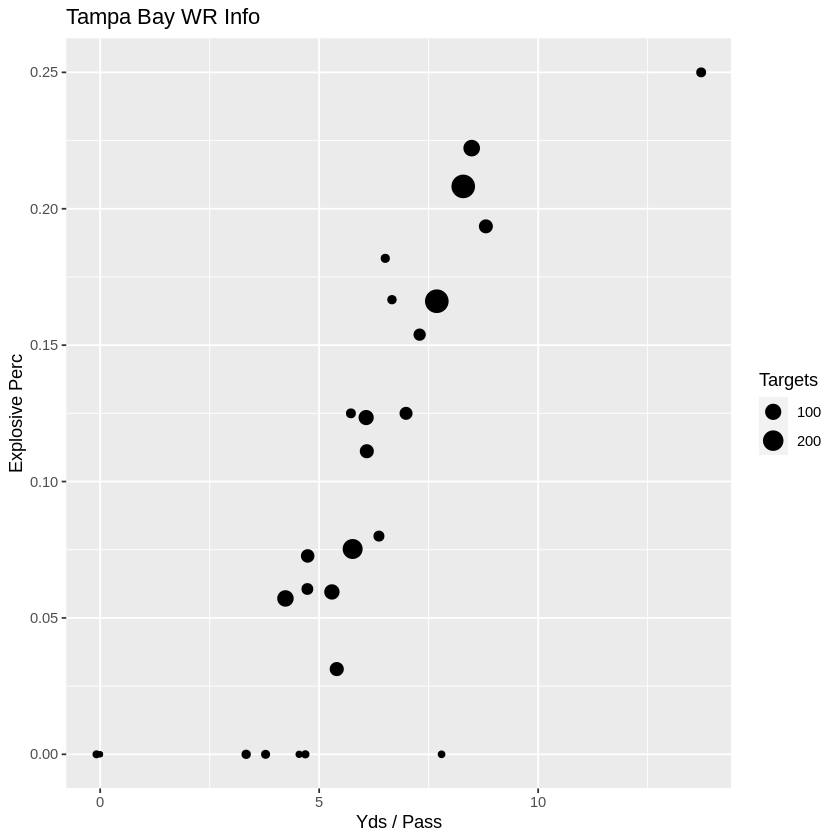

In [7]:
ggplot(receiver_data, aes(x=Yds_Per_Catch, y=Explosive_Perc, size = Targets)) +
  geom_point(color = "black") +
  labs(
    title = "Tampa Bay WR Info",
    x = "Yds / Pass",
    y = "Explosive Perc"
  )

One area that Tom Brady gets a lot of credit for is throwing over the middle of the field. Whether it was to slot receivers like Wes Welker and Julian Edelman, or his trusty Tight End Gronk. The middle of the field is where he did a lot of damage. Let's plot all of his passes that were targeted between the numbers to see who his main targets were in Tampa.

In [8]:
middle_field_passes <- tom_brady_12_passes %>% filter(event_end_y >= 14 & event_end_y <= 39)

middle_field_passes %>% head(5)

,play_uuid,team_name,event_uuid,game_id.x,gsis_game_id.x,gsis_old_game_id.x,game_quarter,event_game_index,gsis_play_id.x,event_video_timestamp,⋯,play_havoc,play_qb_scramble,play_contested_catch_attempt,play_pass_made,play_yards_after_contact,play_target_separation,play_pass_placement_displacement,play_tackle_types,play_catch_separation,play_handoff_received
,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<lgl>
1,0002d7fa-01b8-40f2-905a-144a7ea1851c,Tampa Bay Buccaneers,62025e5c-cb14-4298-bea9-1353255c6cf9,1500278,2022_14_TB_SF,2022121109,4,6205,3867,397.3126,⋯,NA,NA,TRUE,TRUE,NA,4.494304,1.81692920,{},3.675086,NA
2,000eb548-6ce7-4c6d-b7fc-a707169147af,Tampa Bay Buccaneers,ab3254f1-dff2-4186-b711-2cc26b203788,1072133,2021_19_PHI_TB,2022011600,1,754,541,540.6893,⋯,NA,NA,TRUE,TRUE,NA,3.888030,1.02685712,{},2.266868,NA
3,0071ceba-0f46-4a6e-bd95-3af920e10fc7,Tampa Bay Buccaneers,cf9317b3-55e1-421e-ae1e-0e04ed89928f,1500169,2022_07_TB_CAR,2022102301,1,487,320,306.5145,⋯,NA,NA,TRUE,TRUE,0.62,2.716518,0.45662144,"{""Solo - Success""}",1.743454,NA
4,00c577f7-f56a-40bb-89d3-1768b8e55692,Tampa Bay Buccaneers,66326a06-7fd9-4aa9-a809-63341681d8e7,1502262,2021_06_TB_PHI,2021101400,1,1247,836,865.5662,⋯,NA,NA,TRUE,TRUE,4.17,4.223386,0.34656812,"{""Solo - Missed""}",5.905155,NA
5,00d15672-e7fc-43b5-98b3-ff6db50de2f1,Tampa Bay Buccaneers,dd0c757c-7594-4b0b-b355-b1babdd031b0,1500210,2022_10_SEA_TB,2022111300,2,2601,1332,543.0372,⋯,NA,NA,TRUE,TRUE,0.00,6.339435,0.04936659,"{""Solo - Success""}",10.554783,NA


Let's build a field to plot these passes!

In [9]:
devtools::install_github("nsgrantham/ggdark")
library(ggdark)

Skipping install of 'ggdark' from a github remote, the SHA1 (b39b96c2) has not changed since last install.
  Use `force = TRUE` to force installation



Inverted geom defaults of fill and color/colour.
To change them back, use invert_geom_defaults().



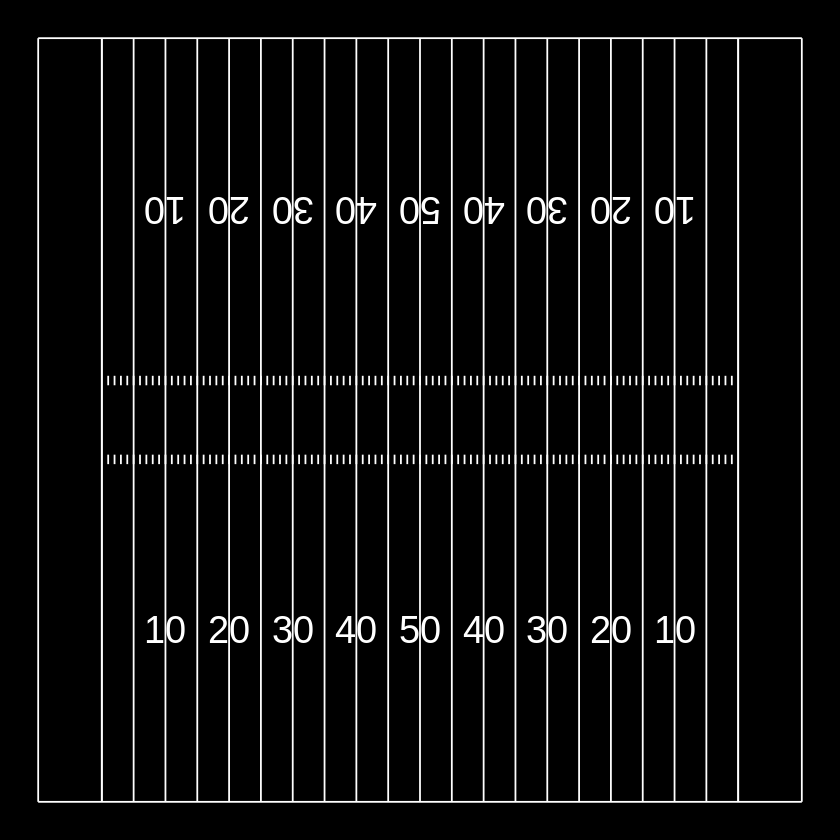

In [10]:
left_hashes = data.frame(
  x = c(1:99),
  xend = c(1:99),
  y = c((70*12+9)/36),
  yend = c(((70*12+9)/36)+.66)
)
right_hashes = data.frame(
  x = c(1:99),
  xend = c(1:99),
  y = c(29.09),
  yend = c(29.75)
)
yard_markers = data.frame(
  x=c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
  xend = c(0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100),
  y=c(0),
  yend=c(53.33)
)

FarFieldNumbers = data.frame(x= c(10,20,30,40,50,60,70,80,90), y = c(41.33), Number = c(10,20,30,40,50,40,30,20,10))
CloseFieldNumbers = data.frame(x= c(10,20,30,40,50,60,70,80,90), y = c(12), Number = c(10,20,30,40,50,40,30,20,10))

full_field <- ggplot() +
  geom_segment(aes(x=0,y=0,xend=0,yend=53.33)) +
  geom_segment(aes(x=-10,y=0,xend=-10,yend=53.33)) +
  geom_segment(aes(x=100,y=0,xend=100,yend=53.33)) +
  geom_segment(aes(x=110,y=0,xend=110,yend=53.33)) +
  geom_segment(aes(x=-10,y=0,xend=110,yend=0)) +
  geom_segment(aes(x=-10,y=53.33,xend=110,yend=53.33)) +
  geom_segment(data= yard_markers, aes(x=x, xend=xend, y=y, yend=yend)) +
  geom_segment(data = left_hashes, aes(x=x, xend=xend, y=y, yend=yend)) +
  geom_segment(data = right_hashes, aes(x=x, xend=xend, y=y, yend=yend)) +
  geom_text(data = CloseFieldNumbers, mapping = aes(x,y, label = Number), colour = "#FFFFFF", size = 8,) + ##These are the Numbers on the field
  geom_text(data = FarFieldNumbers, mapping = aes(x, y, label = Number), colour = "#FFFFFF", size = 8, angle = 180) +
  dark_theme_void()

full_field

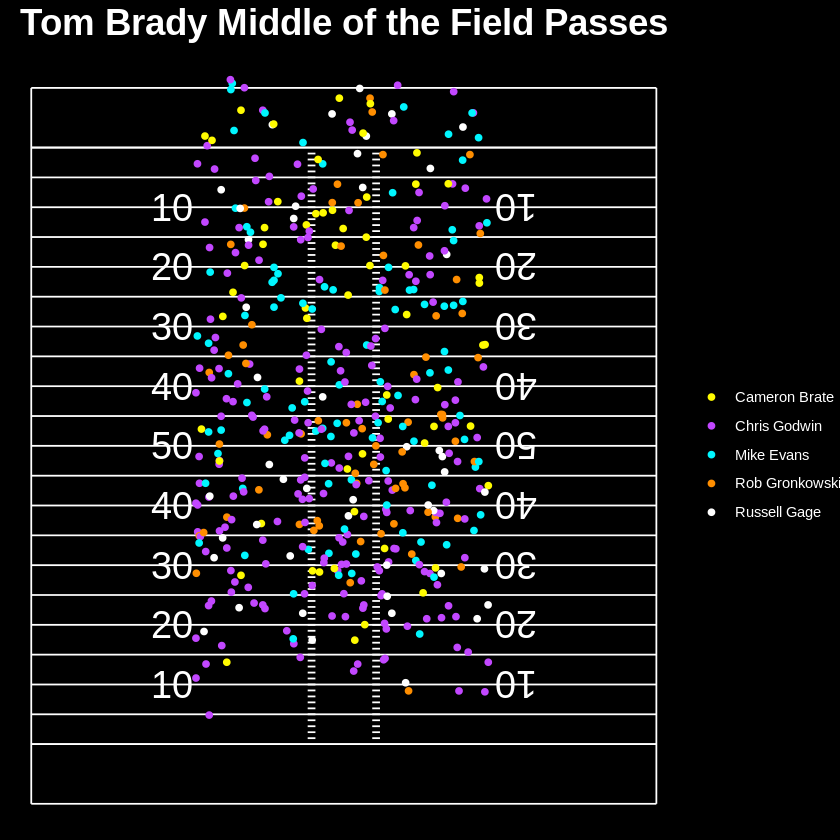

In [11]:
top_middle_field_receivers <- middle_field_passes %>% filter(receiver_player_name %in% c("Rob Gronkowski", "Chris Godwin", "Mike Evans", "Cameron Brate", "Russell Gage"))

full_field +
  geom_point(data = top_middle_field_receivers, aes(x=event_end_x, y=event_end_y, color = receiver_player_name)) +
  coord_flip() +
  scale_color_manual(values = c("Rob Gronkowski" = "#Ff8e00", "Chris Godwin" = "#c247ff", "Mike Evans" = "#00f6ff", "Cameron Brate" = "#Fffb00", "Russell Gage" = "#FFFFFF")) +
    labs(
    title = "Tom Brady Middle of the Field Passes",
    color = ""
  ) +
  theme(
    plot.title = element_text(hjust = 0.5, size=22, face = "bold")
  )

There is so much in this dataset, and I am excited to see what everyone puts together!

Remember to share your work online and use the #TB12DB so that everyone can share the data and work together in analyzing one of the best to ever do it!